In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

[[255 164 156 ... 108 108 100]
 [  0   0   0 ... 108   0   0]
 [ 92  84  84 ... 116   0 100]
 ...
 [  0   0  36 ... 108 100 100]
 [ 36  36  44 ... 108 100 100]
 [255  44 255 ... 108 255   0]]


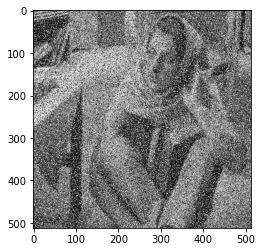

In [2]:
img= cv2.imread('img3.png',0)
# img=cv2.resize(img,(512,512))
# fig=plt.figure(figsize=(15,15))
# ax=fig.add_subplot(111)
plt.imshow(img,'gray')
print(img)

In [3]:
padded_arr =cv2.copyMakeBorder(img,1,1,1,1,cv2.BORDER_CONSTANT,value=0)
new_img=np.zeros(img.shape)

In [4]:
for i in range (img.shape[0]):
    for j in range(img.shape[1]):
        median=np.zeros((3,3))
        median=padded_arr[i:i+3 , j:j+3]
        np.reshape(median,9, order='F')
        np.sort(median)
        new_img[i][j]=np.median(median)
        
        
#print(median)

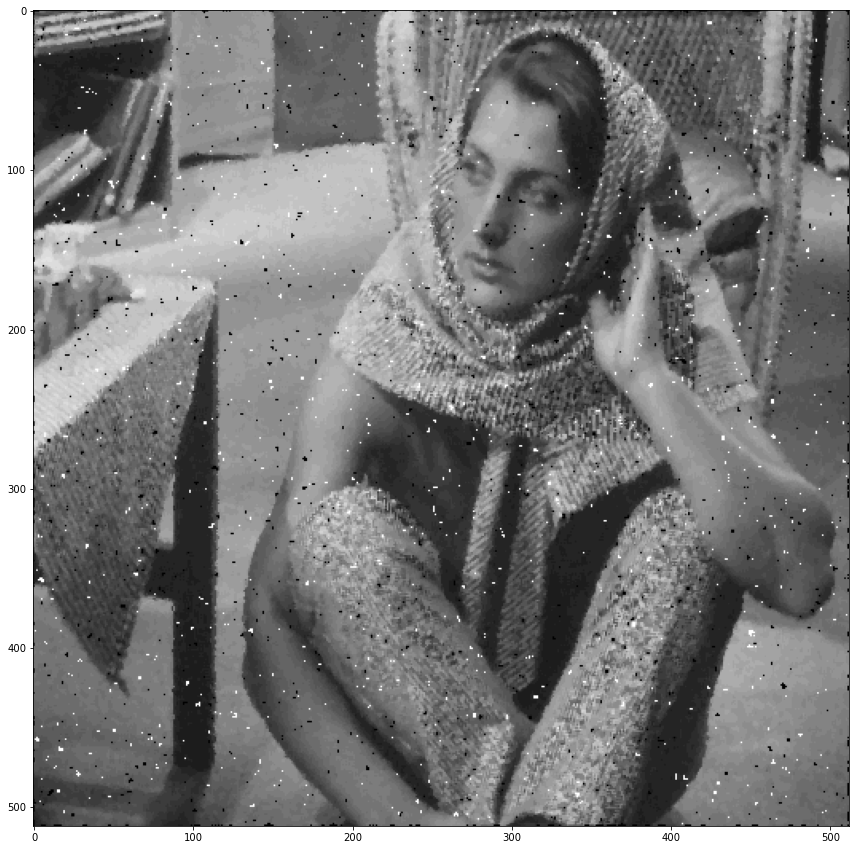

In [5]:
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(111)
plt.imshow(new_img,'gray')